# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Fraud= pd.read_csv("C:\\Excelr Data\\Assignments\\Decision Tree\\Fraud_check.csv")
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
Taxable_Income = [] 


In [5]:
for value in Fraud["Taxable.Income"]: 
    if value <= 30000: 
        Taxable_Income.append("Risky") 
    #elif value >=9.320000: 
    #    sales_quality.append("high") 
    else:
        Taxable_Income.append("Good")
       
Fraud["Taxable_Income"] =Taxable_Income   


In [6]:
Fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [7]:
Fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [8]:
Fraud['Undergrad'] = Fraud['Undergrad'].apply(lambda x: 0 if x=='no' else 1)
Fraud['Urban'] = Fraud['Urban'].apply(lambda x: 0 if x=='no' else 1)


In [9]:
Fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,1,Single,50047,10,1,Good
1,1,Divorced,134075,18,1,Good
2,1,Married,160205,30,1,Good
3,1,Single,193264,15,1,Good
4,1,Married,27533,28,1,Good
...,...,...,...,...,...,...
595,1,Divorced,39492,7,1,Good
596,1,Divorced,55369,2,1,Good
597,1,Divorced,154058,0,1,Good
598,1,Married,180083,17,1,Good


In [10]:
Fraud.rename(columns={"Marital.Status":"MaritalStatus"},inplace=True)   


In [11]:
Fraud

,Undergrad,MaritalStatus,City.Population,Work.Experience,Urban,Taxable_Income
0,1,Single,50047,10,1,Good
1,1,Divorced,134075,18,1,Good
2,1,Married,160205,30,1,Good
3,1,Single,193264,15,1,Good
4,1,Married,27533,28,1,Good
...,...,...,...,...,...,...
595,1,Divorced,39492,7,1,Good
596,1,Divorced,55369,2,1,Good
597,1,Divorced,154058,0,1,Good
598,1,Married,180083,17,1,Good


In [12]:
# Import label encoder 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

In [13]:
Fraud.MaritalStatus = label_encoder.fit_transform(Fraud.MaritalStatus) 
Fraud.MaritalStatus.unique() 

array([2, 0, 1])

In [14]:
Fraud.head()

,Undergrad,MaritalStatus,City.Population,Work.Experience,Urban,Taxable_Income
0,1,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,1,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,1,1,27533,28,1,Good


In [15]:
Fraud.isnull().sum()

Undergrad          0
MaritalStatus      0
City.Population    0
Work.Experience    0
Urban              0
Taxable_Income     0
dtype: int64

In [16]:
Fraud['Taxable_Income'].unique()


array(['Good', 'Risky'], dtype=object)

In [17]:
Fraud.Taxable_Income.value_counts()


Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [18]:
colnames = list(Fraud.columns)
colnames

['Undergrad',
 'MaritalStatus',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable_Income']

In [19]:
predictors = colnames[:5]
predictors

['Undergrad', 'MaritalStatus', 'City.Population', 'Work.Experience', 'Urban']

In [20]:
target = colnames[5]
target

'Taxable_Income'

In [21]:
# Splitting data into training and testing data set

import numpy as np

In [22]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(Fraud,test_size = 0.3, random_state=0)


In [23]:
from sklearn.tree import  DecisionTreeClassifier
#help(DecisionTreeClassifier)

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy')
model

DecisionTreeClassifier(criterion='entropy')

In [25]:
model.fit(train[predictors],train[target])


DecisionTreeClassifier(criterion='entropy')

In [26]:
preds = model.predict(test[predictors])
#preds is predicted values of test data

In [27]:
type(preds)


numpy.ndarray

In [28]:
pd.Series(preds).value_counts()


Good     144
Risky     36
dtype: int64

In [29]:
pd.crosstab(test[target],preds)


col_0,Good,Risky
Taxable_Income,,
Good,113,24
Risky,31,12


In [30]:
np.mean(preds==test.Taxable_Income) # Accuracy = Test


0.6944444444444444

In [31]:
temp = pd.Series(model.predict(train[predictors])).reset_index(drop=True)
temp

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
415    Good
416    Good
417    Good
418    Good
419    Good
Length: 420, dtype: object

In [32]:
np.mean(pd.Series(train.Taxable_Income).reset_index(drop=True) == pd.Series(model.predict(train[predictors])))
# Accuracy = train

1.0

## Boosting 

In [33]:
import xgboost as xgb
import pandas as pd

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
x,y=Fraud.iloc[:,:5],Fraud.iloc[:,5]


In [36]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.28,random_state= 10)


In [37]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(n_estimators=2000,learning_rate=0.3)
xgb1

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [38]:
xgb1.fit(train_x,train_y)### Preparing XGB classifier 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
train_pred = xgb1.predict(train_x)
train_pred

array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 

In [40]:
import numpy as np
train_acc = np.mean(train_pred==train_y) 
train_acc

1.0

In [41]:
test_pred = xgb1.predict(test_x)
test_pred

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [42]:
test_acc = np.mean(test_pred==test_y)
test_acc

0.6272189349112426

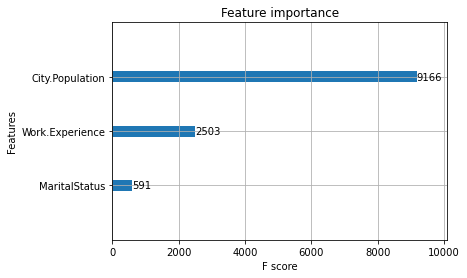

In [43]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)
